In [24]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [25]:
import numpy
import torch
import typing

from holo.prettyFormats import prettyPrint

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"using device: {device}")

using device: cuda:0


In [27]:
import handleDatas
import train
import basicModels

def cell():
    global handleDatas, train, basicModels
    import importlib
    handleDatas = importlib.reload(handleDatas)
    train = importlib.reload(train)
    basicModels = importlib.reload(basicModels)

cell();

In [28]:
#datashandler = handleDatas.Cifar100_Datas(
#    fromTrainSource=None, maxSamples=None, trainProp=0.8,
#    batchSizeTrain=256, batchSizeTest=256)

datashandler = handleDatas.HandleImagesClassifDatas.merge(
    #handleDatas.MNIST_Datas(
    #    fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    #handleDatas.FashionMNIST_Datas(
    #    fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    handleDatas.Cifar10_Datas(
        fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    #handleDatas.Cifar100_Datas(
    #    fromTrainSource=None, maxSamples=None, trainProp=0.8, batchSizeTrain=256, batchSizeTest=256),
    trainProp=0.8, batchSizeTrain=256, batchSizeTest=256)

loaded Cifar10(total: 60000), train: 48000 [188 batches] | test: 12000 [47 batches]
loaded Merged[Cifar10](total: 60000), train: 48000 [188 batches] | test: 12000 [47 batches]


In [29]:
model, optim, loss = basicModels.BasicImageClassifModel.get_Cifar_like_32x32x3(
    device=device, nbClasses=datashandler.nbClasses, modelConfig="large")
hist = train.HistoryClassification()
basicModels.countLayersparameters(model)
trainer = train.TrainerClassif(model=model, optimizer=optim, criterion=loss, device=device)

# test the model
_ = model(datashandler.full_dataset[0]['image'].to(device))

+----------------------+------------+
|       Modules        | Parameters |
+----------------------+------------+
| CNN_block1.0.weight  |   1_728    |
| CNN_block2.0.weight  |   73_728   |
| CNN_block2.1.weight  |    128     |
|  CNN_block2.1.bias   |    128     |
| CNN_block3.0.weight  |  147_456   |
| CNN_block4.0.weight  |  147_456   |
| CNN_block5.0.weight  |  294_912   |
| CNN_block6.0.weight  | 1_179_648  |
| CNN_block6.1.weight  |    512     |
|  CNN_block6.1.bias   |    512     |
| outputBlock.2.weight |   81_920   |
|  outputBlock.2.bias  |     10     |
+----------------------+------------+
Total Trainable Params: 1_928_138


In [30]:
trainer.train_model_classif(datasHandler=datashandler, nbEpoches=10, history=hist);

Epoch 1, train: (loss: 1.819, accuracy: 38.63%), test: (loss: 1.556, accuracy: 45.19%), lr: 1.0000e-03
Epoch 2, train: (loss: 1.202, accuracy: 57.73%), test: (loss: 1.324, accuracy: 57.62%), lr: 1.0000e-03
Epoch 3, train: (loss: 0.9522, accuracy: 67.08%), test: (loss: 1.047, accuracy: 64.44%), lr: 1.0000e-03
Epoch 4, train: (loss: 0.8125, accuracy: 71.95%), test: (loss: 0.8414, accuracy: 71.96%), lr: 1.0000e-03
Epoch 5, train: (loss: 0.6799, accuracy: 76.45%), test: (loss: 0.8053, accuracy: 72.44%), lr: 1.0000e-03
Epoch 6, train: (loss: 0.585, accuracy: 79.80%), test: (loss: 0.883, accuracy: 71.07%), lr: 1.0000e-03
Epoch 7, train: (loss: 0.5072, accuracy: 82.44%), test: (loss: 0.6945, accuracy: 77.26%), lr: 1.0000e-03
Epoch 8, train: (loss: 0.4488, accuracy: 84.45%), test: (loss: 0.6427, accuracy: 79.16%), lr: 1.0000e-03
Epoch 9, train: (loss: 0.3893, accuracy: 86.38%), test: (loss: 0.6532, accuracy: 78.88%), lr: 1.0000e-03
Epoch 10, train: (loss: 0.3288, accuracy: 88.46%), test: (loss

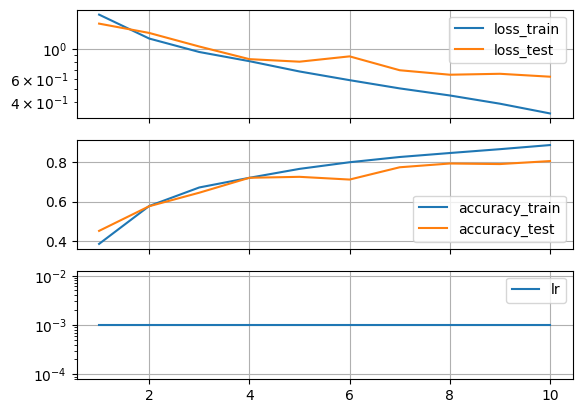

In [31]:
hist.plot();

In [32]:
print("\n".join(map(str, hist)))

Epoch 1, train: (loss: 1.819, accuracy: 38.63%), test: (loss: 1.556, accuracy: 45.19%), lr: 1.0000e-03
Epoch 2, train: (loss: 1.202, accuracy: 57.73%), test: (loss: 1.324, accuracy: 57.62%), lr: 1.0000e-03
Epoch 3, train: (loss: 0.9522, accuracy: 67.08%), test: (loss: 1.047, accuracy: 64.44%), lr: 1.0000e-03
Epoch 4, train: (loss: 0.8125, accuracy: 71.95%), test: (loss: 0.8414, accuracy: 71.96%), lr: 1.0000e-03
Epoch 5, train: (loss: 0.6799, accuracy: 76.45%), test: (loss: 0.8053, accuracy: 72.44%), lr: 1.0000e-03
Epoch 6, train: (loss: 0.585, accuracy: 79.80%), test: (loss: 0.883, accuracy: 71.07%), lr: 1.0000e-03
Epoch 7, train: (loss: 0.5072, accuracy: 82.44%), test: (loss: 0.6945, accuracy: 77.26%), lr: 1.0000e-03
Epoch 8, train: (loss: 0.4488, accuracy: 84.45%), test: (loss: 0.6427, accuracy: 79.16%), lr: 1.0000e-03
Epoch 9, train: (loss: 0.3893, accuracy: 86.38%), test: (loss: 0.6532, accuracy: 78.88%), lr: 1.0000e-03
Epoch 10, train: (loss: 0.3288, accuracy: 88.46%), test: (loss

In [33]:
def cell():
    conf = hist[-1].test.confusionMatrix
    #print(conf.matrix[0, :].T)
    #print(conf.matrix[65, 65], conf.matrix[65, :])
    
    with numpy.printoptions(threshold=100_000, linewidth=100_000):
        print(conf.matrix)
    print()

    for clsIndex in range(datashandler.nbClasses):
        print(f"class: {clsIndex}, precision:{conf.classPrecision(clsIndex):.2%}, "
              f"hitRate: {conf.classHitRate(clsIndex):.2%}")
    print()
    
    prettyPrint(conf.worstK_confusions(10), 
                specificCompact={tuple}, specificFormats={numpy.float64:lambda x:f"{x:.4g}"})
cell(); del cell

[[ 999   10   53   11    7    5    7    7   38   38]
 [  24 1182    5    6    1    1    1    3   31  165]
 [  40    1  814   35   22   34   16   23    8    7]
 [  25    5   52  791   24  207   24   44   12   18]
 [  32    0  123  101 1044   77   24  121   11   13]
 [   7    1   33   96    7  757    6   36    3    5]
 [  15    9   92  103   55   70 1091   13    6    8]
 [  10    1   27   21   23   31    4  936    6   13]
 [  46    3    9    8    4    6    2    4 1114   20]
 [   9   18    3    2    0    0    0    4    3  918]]

class: 0, precision:85.02%, hitRate: 82.77%
class: 1, precision:83.30%, hitRate: 96.10%
class: 2, precision:81.40%, hitRate: 67.22%
class: 3, precision:65.81%, hitRate: 67.38%
class: 4, precision:67.53%, hitRate: 87.95%
class: 5, precision:79.60%, hitRate: 63.72%
class: 6, precision:74.62%, hitRate: 92.85%
class: 7, precision:87.31%, hitRate: 78.59%
class: 8, precision:91.61%, hitRate: 90.42%
class: 9, precision:95.92%, hitRate: 76.18%

[
    (0.08793542905692438,